Predicting Employees Turnover
---
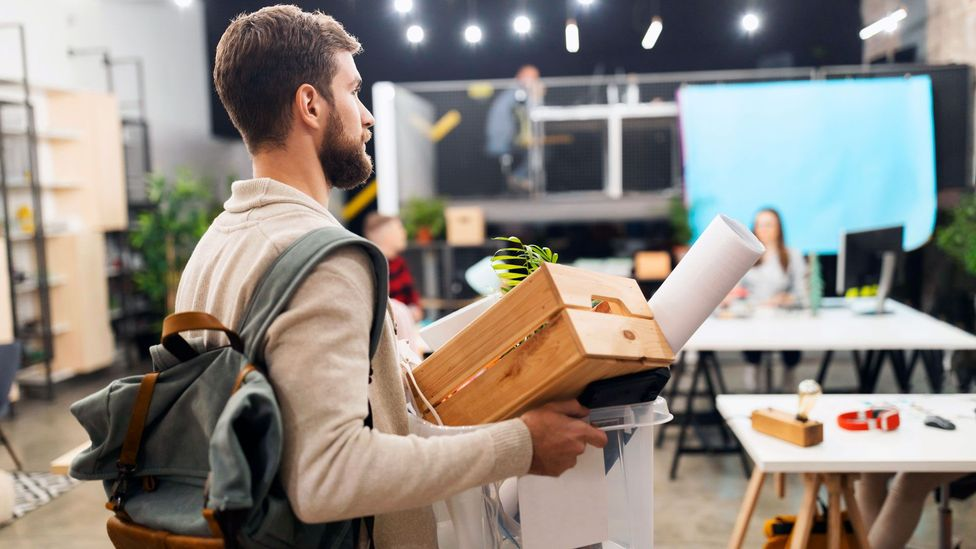

BY: PRECIOUS EBITE AZUN

Importing Libraries
---

In [297]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

In [298]:
df= pd.read_csv('hr_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [299]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [300]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [301]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [302]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [303]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [304]:
df.duplicated().sum()

3008

In [305]:
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

Exploratory Data Analysis
---

In [306]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low


In [307]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         5
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

<AxesSubplot:xlabel='number_project', ylabel='count'>

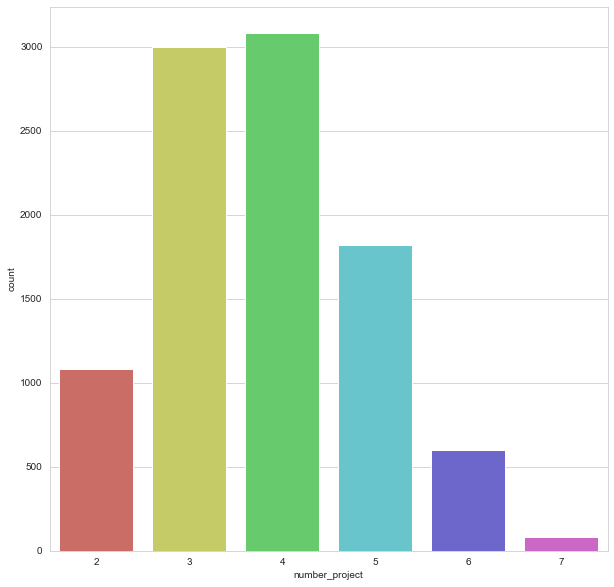

In [308]:
sns.set_style('whitegrid')
sns.countplot('number_project', data=df, palette='hls')

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

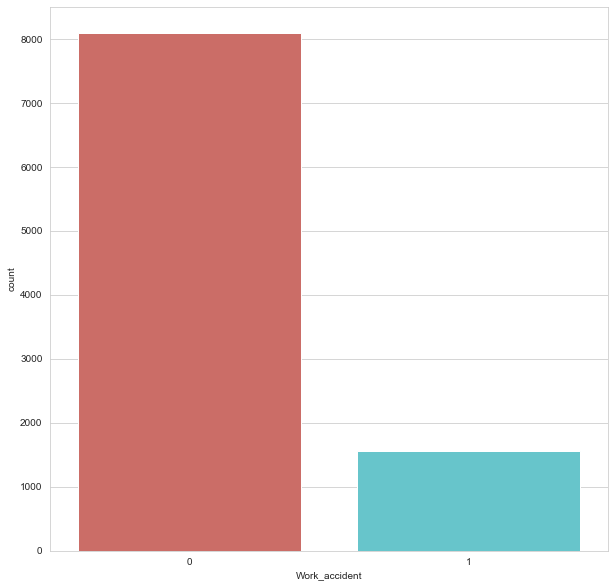

In [309]:
sns.countplot('Work_accident', data=df, palette='hls')

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

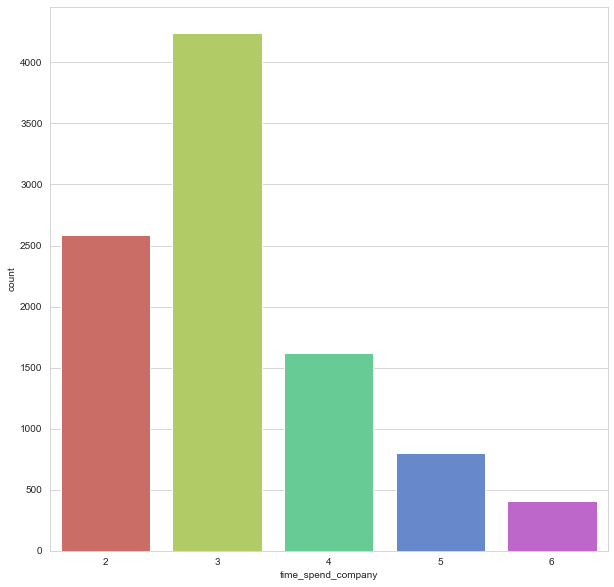

In [310]:
sns.countplot('time_spend_company', data=df, palette='hls')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

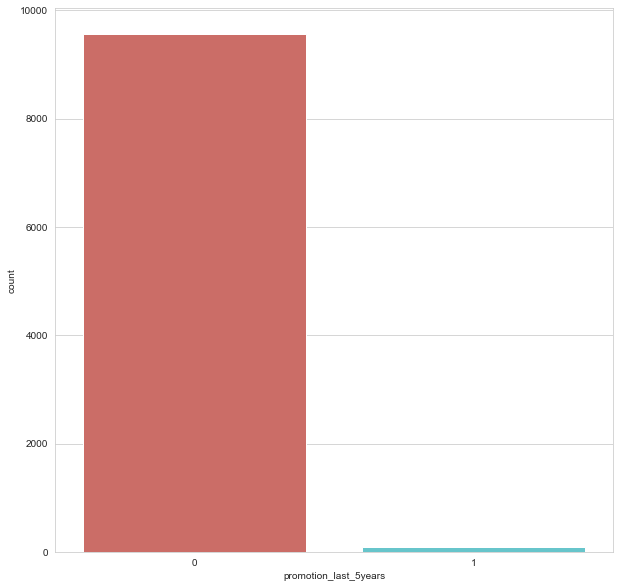

In [311]:
sns.countplot('promotion_last_5years', data=df, palette='hls')

<AxesSubplot:xlabel='sales', ylabel='count'>

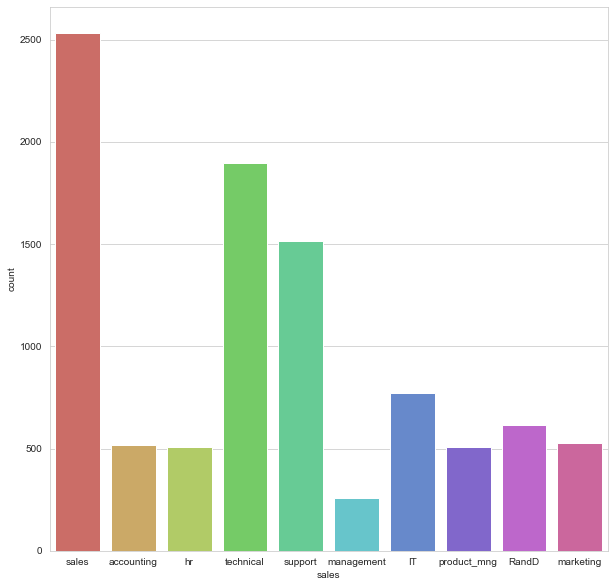

In [312]:
sns.countplot('sales', data=df, palette='hls')

<AxesSubplot:xlabel='left', ylabel='count'>

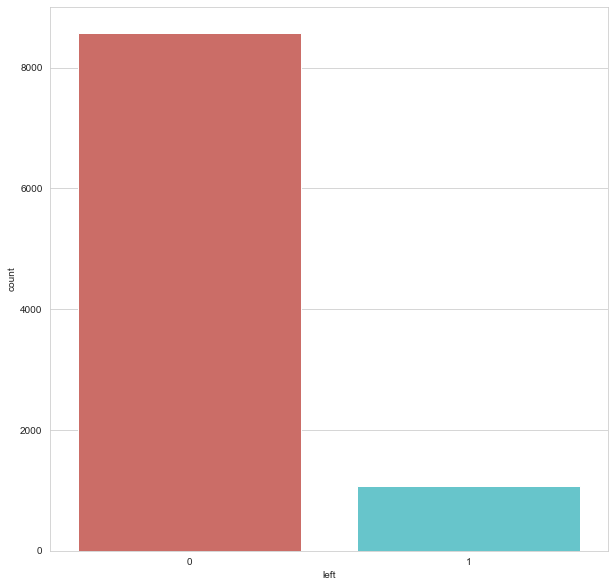

In [313]:
sns.countplot('left', data=df, palette='hls')

There seems to be hidden values present in the Sales column, lets extract this

In [314]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [315]:
df.sales.value_counts()

sales          2532
technical      1899
support        1515
IT              774
RandD           616
marketing       526
accounting      517
hr              508
product_mng     508
management      258
Name: sales, dtype: int64

In [316]:
df=df.rename(columns={'sales':'departments'})

In [317]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low


In [318]:
numbs= ['departments','salary']
for var in numbs:
    fig_present='var'+'_'+var
    fig_present=pd.get_dummies(df[var], prefix=var)
    df1=df.join(fig_present)
    df=df1

In [319]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary,...,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_high,salary_low,salary_medium
783,0.36,0.46,2,132,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
784,0.44,0.57,2,131,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
785,0.85,0.99,5,248,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
786,0.78,0.93,5,225,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
787,0.39,0.46,2,156,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [320]:
df.drop(df.columns[[8,9]], axis=1, inplace=True)
df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'departments_IT',
       'departments_RandD', 'departments_accounting', 'departments_hr',
       'departments_management', 'departments_marketing',
       'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

Partitioning
---

In [321]:
X=df.drop(labels='left', axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments_IT,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_high,salary_low,salary_medium
783,0.36,0.46,2,132,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
784,0.44,0.57,2,131,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
785,0.85,0.99,5,248,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
786,0.78,0.93,5,225,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
787,0.39,0.46,2,156,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,0.75,0.71,4,155,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10568,0.91,0.40,6,153,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10569,0.84,0.62,4,138,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10570,0.64,0.51,4,177,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [322]:
Y=df.left
Y

783      1
784      1
785      1
786      1
787      1
        ..
10567    0
10568    0
10569    0
10570    0
10571    0
Name: left, Length: 9653, dtype: int64

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, shuffle=True)

In [335]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments_IT,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_high,salary_low,salary_medium
6064,0.73,0.59,4,214,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9337,0.61,0.59,3,157,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1195,0.80,0.85,4,264,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1400,0.45,0.47,2,136,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4908,0.93,0.55,5,222,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,0.94,0.66,4,230,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6110,0.86,0.56,5,237,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6309,0.94,0.66,5,219,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1650,0.77,0.98,4,238,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [336]:
Y_test

8991     0
6336     0
1522     1
8744     0
8444     0
        ..
10536    0
6568     0
7816     0
9077     0
8005     0
Name: left, Length: 1931, dtype: int64

In [337]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments_IT,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_high,salary_low,salary_medium
8991,0.75,0.82,5,202,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6336,0.49,0.78,3,264,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1522,0.10,0.82,7,265,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8744,0.12,0.50,5,287,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8444,0.66,0.68,4,269,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10536,0.61,0.88,5,134,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6568,0.63,0.98,4,228,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7816,0.30,0.88,5,245,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9077,0.56,0.53,3,189,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [338]:
Y_train

6064    0
9337    0
1195    1
1400    1
4908    0
       ..
6653    0
6110    0
6309    0
1650    1
8189    0
Name: left, Length: 7722, dtype: int64

In [341]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7722, 20), (1931, 20), (7722,), (1931,))

Algorithms Implementation 
---

KNN
---

In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [325]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [343]:
Y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
ac_knn=accuracy_score(Y_test,Y_pred)

In [344]:
Y_test

8991     0
6336     0
1522     1
8744     0
8444     0
        ..
10536    0
6568     0
7816     0
9077     0
8005     0
Name: left, Length: 1931, dtype: int64

In [345]:
Y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [342]:
ac_knn

0.9575349559813569

Decision Tree
---

In [327]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [328]:
Y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9575349559813569

Logistic Regression
---

In [329]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [347]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(Y_test,Y_pred)

In [348]:
Y_test

8991     0
6336     0
1522     1
8744     0
8444     0
        ..
10536    0
6568     0
7816     0
9077     0
8005     0
Name: left, Length: 1931, dtype: int64

In [349]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [346]:
ac_lr

0.8741584671154842

Visualizing our algorithms
---


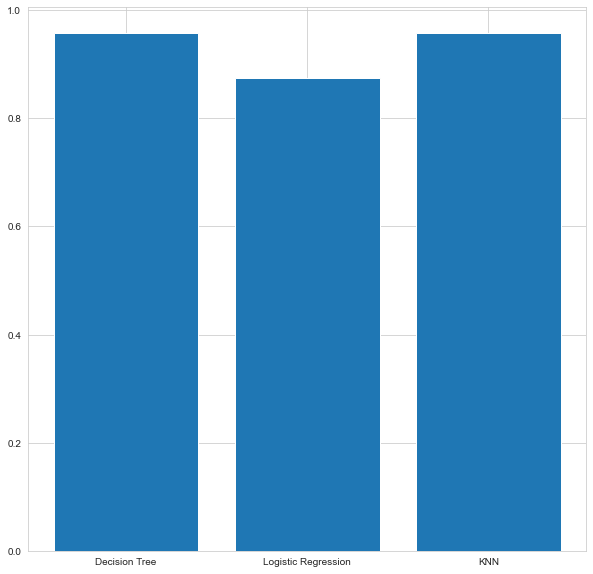

In [334]:
plt.bar(['Decision Tree','Logistic Regression','KNN'],[ac_dt,ac_lr,ac_knn])
plt.show()

KNN and Decision Tree has the has accuracy of 0.957 == 95%
---